
# Three-Dimensional Kriging Example


In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D

data = np.array(
    [
        [0.1, 0.1, 0.3, 0.9],
        [0.2, 0.1, 0.4, 0.8],
        [0.1, 0.3, 0.1, 0.9],
        [0.5, 0.4, 0.4, 0.5],
        [0.3, 0.3, 0.2, 0.7],
    ]
)

gridx = np.arange(0.0, 0.6, 0.05)
gridy = np.arange(0.0, 0.6, 0.01)
gridz = np.arange(0.0, 0.6, 0.1)

Create the 3D ordinary kriging object and solves for the three-dimension kriged
volume and variance. Refer to OrdinaryKriging3D.__doc__ for more information.



In [2]:
ok3d = OrdinaryKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3], variogram_model="linear"
)
k3d1, ss3d = ok3d.execute("grid", gridx, gridy, gridz)

Create the 3D universal kriging object and solves for the three-dimension kriged
volume and variance. Refer to UniversalKriging3D.__doc__ for more information.



In [3]:
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)
k3d2, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

To use the generic 'specified' drift term, the user must provide the drift values
at each data point and at every grid point. The following example is equivalent to
using a linear drift in all three spatial dimensions. Refer to
UniversalKriging3D.__doc__ for more information.



In [4]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing="ij")
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["specified"],
    specified_drift=[data[:, 0], data[:, 1], data[:, 2]],
)
k3d3, ss3d = uk3d.execute(
    "grid", gridx, gridy, gridz, specified_drift_arrays=[xg, yg, zg]
)

To use the generic 'functional' drift term, the user must provide a callable
function that takes only the spatial dimensions as arguments. The following example
is equivalent to using a linear drift only in the x-direction. Refer to
UniversalKriging3D.__doc__ for more information.



In [5]:
func = lambda x, y, z: x
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["functional"],
    functional_drift=[func],
)
k3d4, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

Note that the use of the 'specified' and 'functional' generic drift capabilities is
essentially identical in the two-dimensional universal kriging class (except for a
difference in the number of spatial coordinates for the passed drift functions).
See UniversalKriging.__doc__ for more information.



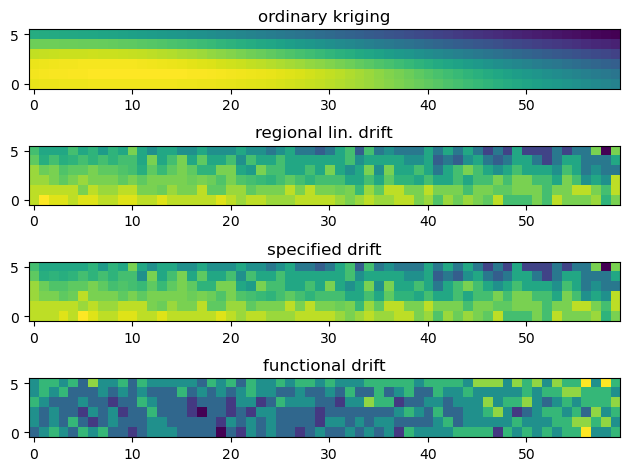

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.imshow(k3d1[:, :, 0], origin="lower")
ax1.set_title("ordinary kriging")
ax2.imshow(k3d2[:, :, 0], origin="lower")
ax2.set_title("regional lin. drift")
ax3.imshow(k3d3[:, :, 0], origin="lower")
ax3.set_title("specified drift")
ax4.imshow(k3d4[:, :, 0], origin="lower")
ax4.set_title("functional drift")
plt.tight_layout()
plt.show()